In [ ]:
pip install jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ArticutAPI

In [61]:
import jieba
content=""
with open('hw1.txt','r') as f:
  for line in f:
    content+=line.replace("\t","").replace(" ","").replace("\n","")

with open("stop.txt",'r',encoding='utf8') as f:
  stops=f.read()

terms =[t for t in jieba.cut(content,cut_all=False) if t not in stops ]

def get_TF(words,topk=100):
  tf_dic={}
  for word in words:
    tf_dic[word]=tf_dic.get(word,0)+1
  return sorted(tf_dic.items(),key=lambda x :x[1],reverse=True)[:topk]


In [18]:
import jieba.analyse as analyse
top100=get_TF(terms)
TF_IDF=jieba.analyse.extract_tags(content, topK=100, withWeight=True)


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

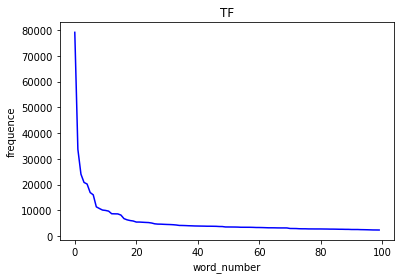

In [56]:
count=[]
plt.xlabel('word_number')
plt.ylabel('frequence',)
plt.title('TF') 
for i in range(100):
  count.append(top100[i][1])
plt.plot(range(100),count,color='b')
plt.show()

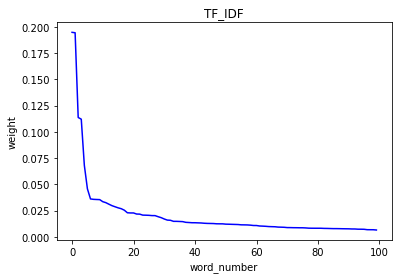

In [57]:
fre=[]
plt.xlabel('word_number')
plt.ylabel('weight',)
plt.title('TF_IDF') 
for i in range(100):
  fre.append(TF_IDF[i][1])
plt.plot(range(100),fre,color='b')
plt.show()

In [ ]:
cloud=[]
for i in terms:
  cloud.append(i)
cloud_fre=Counter(terms)
# for i in cloud_fre:
#   print(i)

In [ ]:
pip install wordcloud

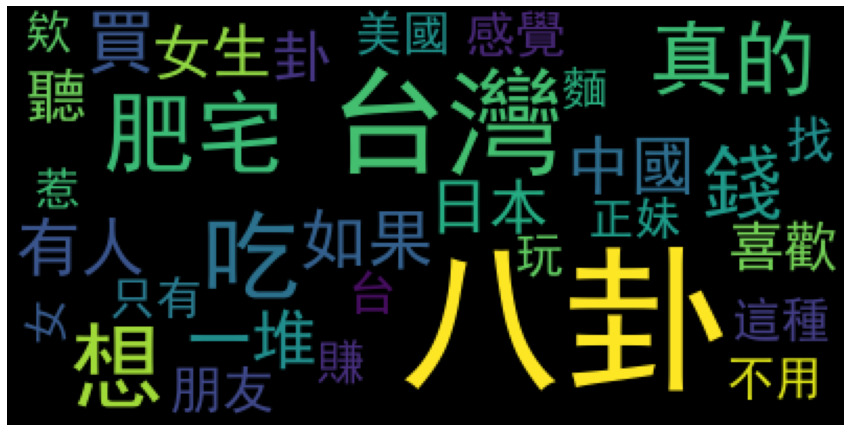

In [90]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
wc = WordCloud(font_path='SimHei.ttf',max_words=32)  
wc.generate_from_frequencies(cloud_fre) 
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()
